## **➡️ Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , roc_auc_score, roc_curve , auc

import joblib


## **➡️Load Data**

In [2]:
df = pd.read_csv('heart_disease_dataset.csv')

In [3]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [4]:
df.columns

Index(['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Smoking', 'Alcohol Intake', 'Exercise Hours', 'Family History',
       'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar',
       'Exercise Induced Angina', 'Chest Pain Type', 'Heart Disease'],
      dtype='object')

| Column Name               | Description                                                                  |
| ------------------------- | ---------------------------------------------------------------------------- |
| `Age`                     | Age of the individual (years)                                                |
| `Gender`                  | Gender of the individual (`Male` / `Female`)                                 |
| `Cholesterol`             | Cholesterol level in mg/dL                                                   |
| `Blood Pressure`          | Systolic blood pressure in mmHg                                              |
| `Heart Rate`              | Heart rate in beats per minute                                               |
| `Smoking`                 | Smoking status (`Never`, `Former`, `Current`)                                |
| `Alcohol Intake`          | Alcohol intake frequency (`None`, `Moderate`, `Heavy`)                       |
| `Exercise Hours`          | Hours of exercise per week                                                   |
| `Family History`          | Family history of heart disease (`Yes` / `No`)                               |
| `Diabetes`                | Diabetes status (`Yes` / `No`)                                               |
| `Obesity`                 | Obesity status (`Yes` / `No`)                                                |
| `Stress Level`            | Stress level on a scale of 1 to 10                                           |
| `Blood Sugar`             | Fasting blood sugar level in mg/dL                                           |
| `Exercise Induced Angina` | Presence of exercise-induced angina (`Yes` / `No`)                           |
| `Chest Pain Type`         | Type of chest pain (`Typical`, `Atypical`, `Non-anginal`, `Asymptomatic`)    |
| `Heart Disease`           | **Target variable** indicating presence of heart disease (`0`: No, `1`: Yes) |


## **➡️ Data Preprocessing**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

#### **Step-1 : ⏩Handling Missing Values**

In [6]:
df['Alcohol Intake'] = df['Alcohol Intake'].fillna ('Unknown')              # Filling missing values in 'Alcohol Intake' column with 'Unknown'   

#### **Step-2 : ⏩Encoding Ctegorical columns**

In [7]:
df['Gender'].value_counts()         # -----> categorical column has 2 unique values

Gender
Female    503
Male      497
Name: count, dtype: int64

In [8]:
df['Smoking'].value_counts()        # -----> categorical column has 3 unique values

Smoking
Never      338
Current    336
Former     326
Name: count, dtype: int64

In [9]:
df['Alcohol Intake'].value_counts()     # -----> categorical column has 2 unique values

Alcohol Intake
Heavy       346
Unknown     340
Moderate    314
Name: count, dtype: int64

In [10]:
df['Family History'].value_counts()     # -----> categorical column has 2 unique values

Family History
No     501
Yes    499
Name: count, dtype: int64

In [11]:
df['Diabetes'].value_counts()         # -----> categorical column has 2 unique values

Diabetes
Yes    505
No     495
Name: count, dtype: int64

In [12]:
df['Obesity'].value_counts()         # -----> categorical column has 2 unique values

Obesity
No     501
Yes    499
Name: count, dtype: int64

In [13]:
df['Exercise Induced Angina'].value_counts()     # -----> categorical column has 2 unique values

Exercise Induced Angina
No     528
Yes    472
Name: count, dtype: int64

In [14]:
df['Chest Pain Type'].value_counts()     # -----> categorical column has 4 unique values

Chest Pain Type
Non-anginal Pain    256
Typical Angina      250
Asymptomatic        248
Atypical Angina     246
Name: count, dtype: int64

In [15]:
# ------> Binary Encoding

binary_cols = ['Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [16]:
# --------> Label Encoding

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [17]:
# --------->  One-Hot Encoding

df = pd.get_dummies(df, columns=['Smoking', 'Alcohol Intake', 'Chest Pain Type'], drop_first=True).astype(int)

In [18]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Heart Disease,Smoking_Former,Smoking_Never,Alcohol Intake_Moderate,Alcohol Intake_Unknown,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
0,75,0,228,119,66,1,0,0,1,8,119,1,1,0,0,0,0,1,0,0
1,48,1,204,165,62,5,0,0,0,9,70,1,0,0,0,0,1,0,0,1
2,53,1,234,91,67,3,1,0,1,5,196,1,1,0,1,0,0,1,0,0
3,69,0,192,90,72,4,0,1,0,7,107,1,0,0,0,0,1,0,1,0
4,62,0,172,163,93,6,0,1,0,2,183,1,0,0,1,0,1,0,0,0


#### **Step-3 : ⏩Train-Test Split**

In [19]:
X = df.drop('Heart Disease',axis=1)
y = df['Heart Disease']

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train.shape , X_test.shape

((800, 19), (200, 19))

In [22]:
y_train.shape , y_test.shape

((800,), (200,))

In [23]:
X_train.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Smoking_Former,Smoking_Never,Alcohol Intake_Moderate,Alcohol Intake_Unknown,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
29,79,1,319,115,63,0,1,0,1,9,95,0,0,1,1,0,0,0,1
535,38,0,340,176,98,5,0,0,0,1,155,1,0,0,0,0,0,1,0
695,62,1,213,141,93,2,0,1,0,6,158,1,0,0,1,0,0,1,0
557,34,1,338,104,83,9,1,1,1,7,105,0,0,1,0,0,0,1,0
836,57,0,185,126,94,1,0,1,0,5,106,0,0,1,1,0,0,0,1


#### **Step-4 : ⏩Scale the values of numeric columns**

In [24]:
numeric_col = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']

In [25]:
scaler = StandardScaler()

scaler.fit(X_train[numeric_col])

X_train[numeric_col] = scaler.transform(X_train[numeric_col])
X_test[numeric_col] = scaler.transform(X_test[numeric_col])

In [26]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [27]:
X_train.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Smoking_Former,Smoking_Never,Alcohol Intake_Moderate,Alcohol Intake_Unknown,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
29,1.706940,1,1.190459,-0.770091,-1.416285,-1.526826,1,0,1,1.163331,-1.101925,0,0,1,1,0,0,0,1
535,-0.914940,0,1.553029,1.533196,1.661639,0.164948,0,0,0,-1.660074,0.531615,1,0,0,0,0,0,1,0
695,0.619819,1,-0.639655,0.211638,1.221936,-0.850117,0,1,0,0.104554,0.613292,1,0,0,1,0,0,1,0
557,-1.170734,1,1.518499,-1.185438,0.342529,1.518367,1,1,1,0.457480,-0.829668,0,0,1,0,0,0,1,0
836,0.300077,0,-1.123082,-0.354744,1.309877,-1.188471,0,1,0,-0.248371,-0.802442,0,0,1,1,0,0,0,1


In [28]:
X_train.columns

Index(['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Exercise Hours', 'Family History', 'Diabetes', 'Obesity',
       'Stress Level', 'Blood Sugar', 'Exercise Induced Angina',
       'Smoking_Former', 'Smoking_Never', 'Alcohol Intake_Moderate',
       'Alcohol Intake_Unknown', 'Chest Pain Type_Atypical Angina',
       'Chest Pain Type_Non-anginal Pain', 'Chest Pain Type_Typical Angina'],
      dtype='object')

In [29]:
X_test.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Smoking_Former,Smoking_Never,Alcohol Intake_Moderate,Alcohol Intake_Unknown,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
521,1.579044,0,-0.035372,-1.487508,-0.624819,-0.850117,0,1,1,1.163331,-1.047473,0,0,0,1,0,0,0,0
737,-0.659147,1,0.741563,0.287156,0.078707,0.503303,1,0,1,1.516257,-0.230703,0,0,1,0,1,0,1,0
740,-0.659147,0,-0.760512,-0.316985,1.573699,-0.850117,1,1,1,-0.601297,0.749420,0,0,0,0,1,0,0,1
660,-0.787044,0,0.655237,-1.298714,0.430470,1.518367,1,1,0,0.457480,0.477164,1,0,1,0,0,0,1,0
411,1.642992,0,-0.639655,-0.619056,1.749580,-0.850117,0,0,1,-0.954223,1.130580,0,0,0,0,0,0,1,0


## **➡️Model-1 (Logistic Regression)**

In [30]:
lg_r_model = LogisticRegression()
lg_r_model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
y_pred_m1 = lg_r_model.predict(X_test)
y_prob_m1 = lg_r_model.predict_proba(X_test)[:,1]

## **➡️Model-1 Evaluation**

#### **⏩ 1. Accuracy Score :**

In [32]:
acc_m1 = accuracy_score (y_test,y_pred_m1)
print("Accuracy :", accuracy_score)

Accuracy : <function accuracy_score at 0x000001875342EC20>


#### **⏩ 2 Confution Matrix :**

In [33]:
cfm_m1= confusion_matrix(y_test,y_pred_m1)
print("Confusion Matrix:\n",cfm_m1) 

Confusion Matrix:
 [[106  12]
 [ 14  68]]


#### **⏩ 3. Classification Report :**

In [34]:
clsfr_m1 = classification_report(y_test,y_pred_m1)
print("Classification Report:\n",clsfr_m1)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       118
           1       0.85      0.83      0.84        82

    accuracy                           0.87       200
   macro avg       0.87      0.86      0.87       200
weighted avg       0.87      0.87      0.87       200



#### **⏩ Confution Matrix Heatmap**

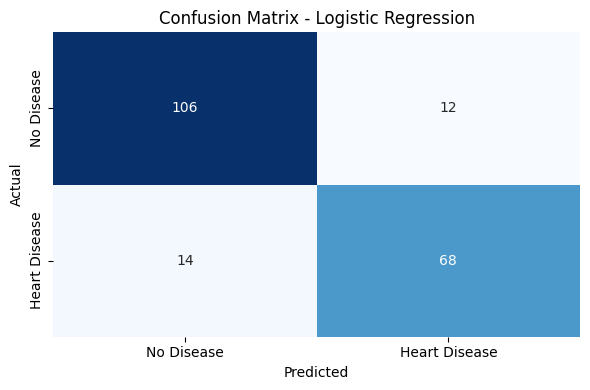

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(cfm_m1,annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Heart Disease'],
             yticklabels=['No Disease', 'Heart Disease']
             )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

#### **⏩ ROC Curve & AUC**

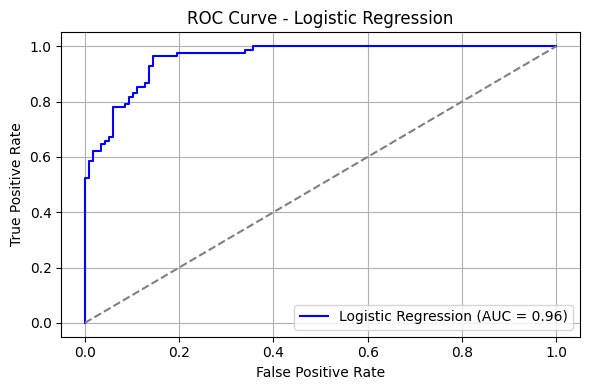

In [36]:
fpr_m1, tpr_m1, _ = roc_curve(y_test, y_prob_m1)
roc_auc_m1 = auc(fpr_m1, tpr_m1)

plt.figure(figsize=(6, 4))
plt.plot(fpr_m1, tpr_m1, label=f'Logistic Regression (AUC = {roc_auc_m1:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **➡️Model-2 (Random Forest)**

In [37]:
rndf = RandomForestClassifier(random_state=42)
rndf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
y_pred_m2 = rndf.predict(X_test)
y_prob_m2 = rndf.predict_proba(X_test)[:,1]

### **➡️Model-2 Evaluation**

#### **⏩ 1. Accuracy Score :**

In [39]:
acc_m2 = accuracy_score (y_test,y_pred_m2)
print("Accuracy :", acc_m2)

Accuracy : 1.0


#### **⏩ 2 Confution Matrix :**

In [40]:
cfm_m2= confusion_matrix(y_test,y_pred_m2)
print("Confusion Matrix:\n",cfm_m2) 

Confusion Matrix:
 [[118   0]
 [  0  82]]


#### **⏩ 3. Classification Report :**

In [41]:
clsfr_m2 = classification_report(y_test,y_pred_m2)
print("Classification Report:\n",clsfr_m2)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



#### **⏩ Confution Matrix Heatmap**

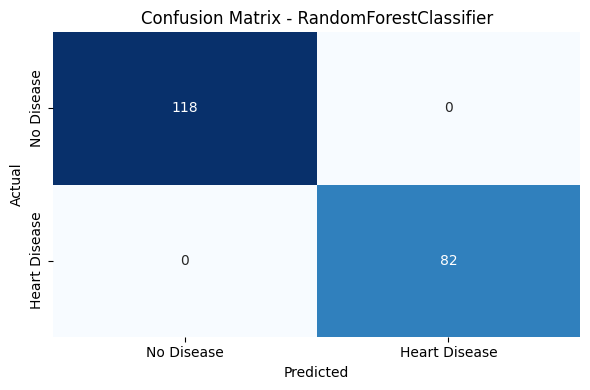

In [42]:
plt.figure(figsize=(6,4))
sns.heatmap(cfm_m2,annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Heart Disease'],
             yticklabels=['No Disease', 'Heart Disease']
             )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.tight_layout()
plt.show()

#### **⏩ ROC Curve & AUC**

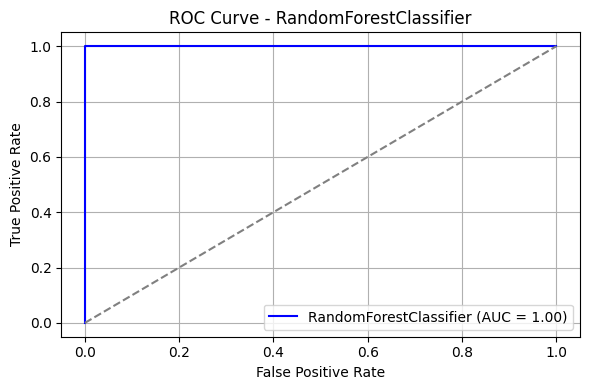

In [43]:
fpr_m2, tpr_m2, _ = roc_curve(y_test, y_prob_m2)
roc_auc_m2 = auc(fpr_m2, tpr_m2)

plt.figure(figsize=(6, 4))
plt.plot(fpr_m2, tpr_m2, label=f'RandomForestClassifier (AUC = {roc_auc_m2:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RandomForestClassifier')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **➡️Save the Best Model**

In [44]:
# --------------------> Random Forest Classifier --> Best Model-------------------------------------->

joblib.dump(rndf,'Heart_Disease_Predictor_Model.pkl')

['Heart_Disease_Predictor_Model.pkl']